In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *
from sklearn.preprocessing import *
import tensorflow as tf
from sklearn.model_selection import *
from sklearn.metrics import *
import joblib

In [2]:
df = pd.read_csv("ETH_1H.csv")
df.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622


In [3]:
len(df)

34497

In [4]:
df.nunique()

Unix Timestamp    34497
Date              34497
Symbol                1
Open              20189
High              19276
Low               19259
Close             20189
Volume            31404
dtype: int64

In [5]:
df_1 = df.drop(columns=["Symbol","Unix Timestamp"])
df_1.head()

,Date,Open,High,Low,Close,Volume
0,2020-04-16 00:00:00,152.94,152.94,150.39,150.39,650.188125
1,2020-04-15 23:00:00,155.81,155.81,151.39,152.94,4277.567299
2,2020-04-15 22:00:00,157.18,157.30,155.32,155.81,106.337279
3,2020-04-15 21:00:00,158.04,158.31,157.16,157.18,55.244131
4,2020-04-15 20:00:00,157.10,158.10,156.87,158.04,144.262622


In [6]:
df_2 = df_1.copy()
df_2["Date"] = pd.to_datetime(df_2["Date"])
df_2["Date"] = df_2["Date"].dt.date

grp_mean = df_2.groupby(by="Date").mean().round(2)
grp_min = df_2.groupby(by="Date").min().round(2)
grp_max = df_2.groupby(by="Date").max().round(2)

df_3 = pd.DataFrame(columns=df_2.columns[1:],index=grp_mean.index)
df_3[["Open","Close","Volume"]] = grp_mean[["Open","Close","Volume"]].copy()
df_3["Low"] = grp_min["Low"].copy()
df_3["High"] = grp_max["High"].copy()

df_3.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-09,8.86,12.00,0.00,9.71,122.08
2016-05-10,9.58,9.96,9.36,9.59,26.96
2016-05-11,9.90,10.47,9.68,9.93,127.19
2016-05-12,10.51,12.00,9.92,10.50,86.36
2016-05-13,10.70,11.59,10.20,10.73,76.56


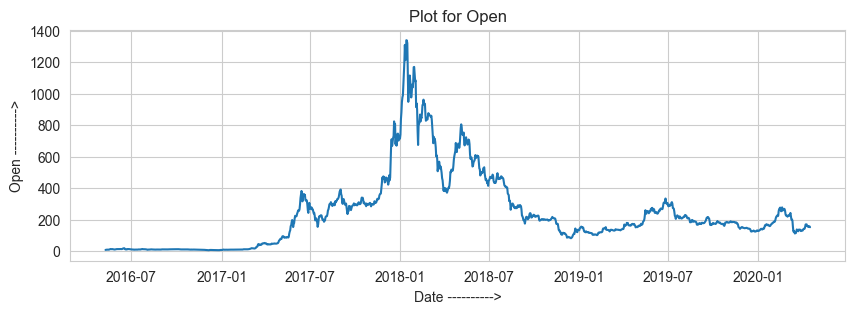

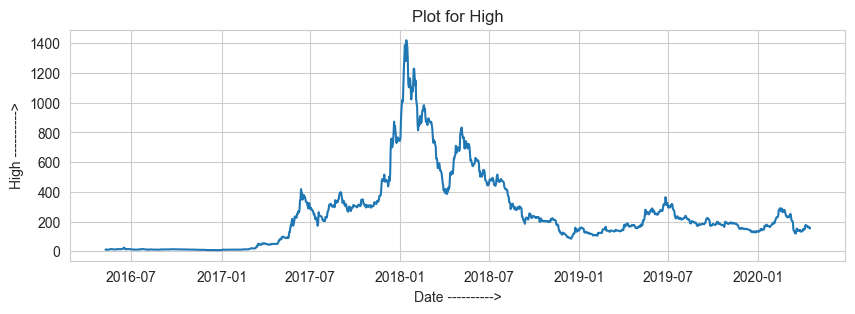

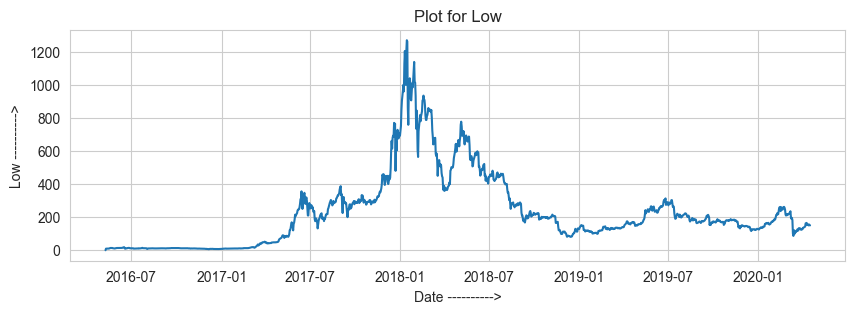

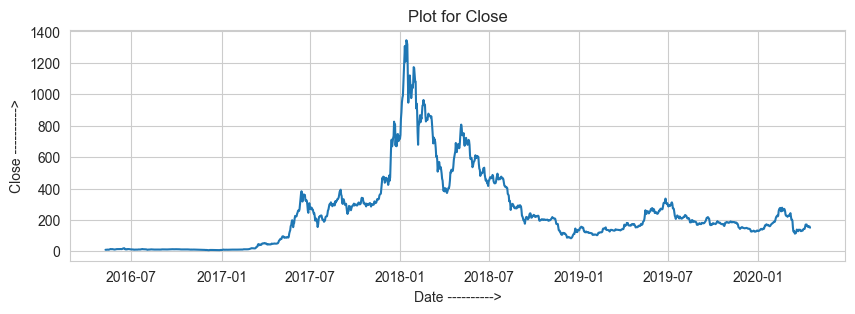

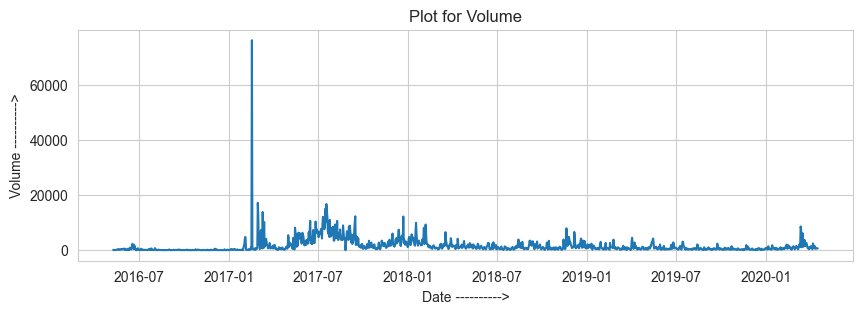

In [7]:
for i in df_3:
    plt.subplots(figsize=(10,3))
    sns.lineplot(df_3[i])
    plt.xlabel("Date ---------->")
    plt.ylabel(i+" ---------->")
    plt.title("Plot for "+i)
    plt.show()

In [8]:
df_4 = df_1.copy()
df_4["Date"] = pd.to_datetime(df_4["Date"])
df_4["hour"] = df_4["Date"].dt.hour
df_4["day"] = df_4["Date"].dt.day
df_4["month"] = df_4["Date"].dt.month
df_4["year"] = df_4["Date"].dt.year
df_4["dayofweek"] = df_4["Date"].dt.dayofweek
df_4["dayofyear"] = df_4["Date"].dt.dayofyear
df_4["weekofyear"] = df_4["Date"].dt.isocalendar().week

<Axes: >

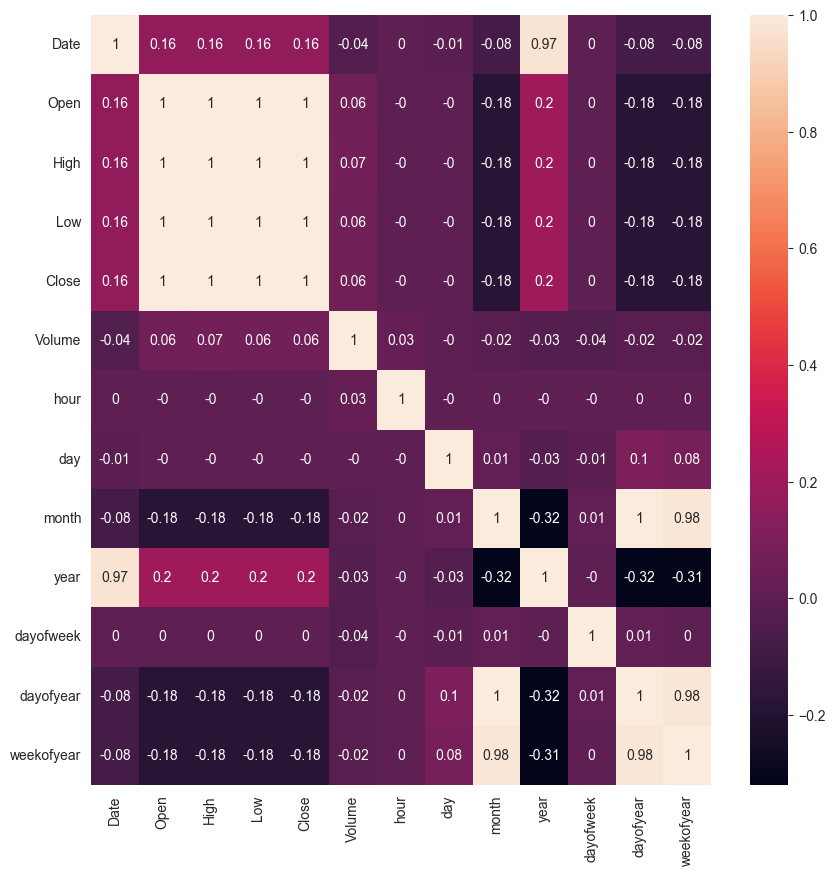

In [9]:
plt.subplots(figsize=(10,10))
sns.heatmap(df_4.corr().round(2), annot=True)

In [10]:
df_5 = df_4.sort_values(by="Date", ascending=True).reset_index(drop=True)
df_5.head()

,Date,Open,High,Low,Close,Volume,hour,day,month,year,dayofweek,dayofyear,weekofyear
0,2016-05-09 13:00:00,0.00,12.00,0.00,9.55,432.562115,13,9,5,2016,0,130,19
1,2016-05-09 14:00:00,9.55,10.00,9.55,10.00,235.774075,14,9,5,2016,0,130,19
2,2016-05-09 15:00:00,10.00,10.00,9.99,9.99,10.973567,15,9,5,2016,0,130,19
3,2016-05-09 16:00:00,9.99,9.99,9.79,9.83,62.379450,16,9,5,2016,0,130,19
4,2016-05-09 17:00:00,9.83,9.83,9.48,9.49,329.553213,17,9,5,2016,0,130,19


### Accuracy of Model

In [11]:
close = df_5["Close"]
no_of_window_samples = 240

close_length_iterate = close.shape[0] - no_of_window_samples

window = []
target = []
dates = []

for i in range(close_length_iterate):
    ini = i
    fin = i + no_of_window_samples
    window.append(close[ini:fin])
    target.append(close[fin])
    dates.append(df_5.loc[fin,"Date"])

window = np.array(window)
target = np.array(target)
dates = np.array(dates)

In [12]:
window

array([[  9.55,  10.  ,   9.99, ...,  14.21,  13.99,  14.3 ],
       [ 10.  ,   9.99,   9.83, ...,  13.99,  14.3 ,  14.1 ],
       [  9.99,   9.83,   9.49, ...,  14.3 ,  14.1 ,  13.68],
       ...,
       [143.51, 143.04, 144.77, ..., 157.1 , 158.04, 157.18],
       [143.04, 144.77, 144.31, ..., 158.04, 157.18, 155.81],
       [144.77, 144.31, 143.91, ..., 157.18, 155.81, 152.94]])

In [13]:
target

array([ 14.1 ,  13.68,  13.98, ..., 155.81, 152.94, 150.39])

In [14]:
np.savez("closing price window and target.npz",window=window,target=target,window_size=no_of_window_samples)

In [15]:
mms = MinMaxScaler()

window_1 = mms.fit_transform(window)
target_1 = mms.fit_transform(target.reshape(-1,1))
dates_1 = dates.copy()

In [16]:
window_1.shape

(34257, 240)

In [17]:
window_1

array([[0.00244431, 0.00276314, 0.00275605, ..., 0.0057459 , 0.00559004,
        0.00580967],
       [0.00276314, 0.00275605, 0.00264269, ..., 0.00559004, 0.00580967,
        0.00566797],
       [0.00275605, 0.00264269, 0.0024018 , ..., 0.00580967, 0.00566797,
        0.0053704 ],
       ...,
       [0.09735447, 0.09702148, 0.09824718, ..., 0.10698294, 0.10764893,
        0.10703962],
       [0.09702148, 0.09824718, 0.09792127, ..., 0.10764893, 0.10703962,
        0.10606898],
       [0.09824718, 0.09792127, 0.09763787, ..., 0.10703962, 0.10606898,
        0.10403559]])

In [18]:
val_test_threshold = round(0.8 * window_1.shape[0])

train_val_threshold = round(0.8 * val_test_threshold)

window_train = window_1[:train_val_threshold,:]
window_val = window_1[train_val_threshold:val_test_threshold,:]
window_test = window_1[val_test_threshold:,:]

target_train = target_1[:train_val_threshold,:]
target_val = target_1[train_val_threshold:val_test_threshold,:]
target_test = target_1[val_test_threshold:,:]

target_train_1 = target[:train_val_threshold]
target_val_1 = target[train_val_threshold:val_test_threshold]
target_test_1 = target[val_test_threshold:]

train_dates = dates_1[:train_val_threshold]
val_dates = dates_1[train_val_threshold:val_test_threshold]
test_dates = dates_1[val_test_threshold:]

no_of_train_rows = window_train.shape[0]
no_of_val_rows = window_val.shape[0]
no_of_test_rows = window_test.shape[0]

window_train = window_train.reshape(no_of_train_rows,1,no_of_window_samples)
window_val = window_val.reshape(no_of_val_rows,1,no_of_window_samples)
window_test = window_test.reshape(no_of_test_rows,1,no_of_window_samples)

In [19]:
window

array([[  9.55,  10.  ,   9.99, ...,  14.21,  13.99,  14.3 ],
       [ 10.  ,   9.99,   9.83, ...,  13.99,  14.3 ,  14.1 ],
       [  9.99,   9.83,   9.49, ...,  14.3 ,  14.1 ,  13.68],
       ...,
       [143.51, 143.04, 144.77, ..., 157.1 , 158.04, 157.18],
       [143.04, 144.77, 144.31, ..., 158.04, 157.18, 155.81],
       [144.77, 144.31, 143.91, ..., 157.18, 155.81, 152.94]])

In [20]:
window_train.shape

(21925, 1, 240)

In [21]:
model = tf.keras.models.Sequential(layers=[
    tf.keras.layers.LSTM(units=100,input_shape=(1,no_of_window_samples)),
    tf.keras.layers.Dropout(rate=0.25),
    tf.keras.layers.Dense(1,activation="linear")
])

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.mean_squared_error)

In [23]:
model.fit(window_train,target_train,validation_data=(window_val,target_val),epochs=100,batch_size=32,verbose=1,shuffle=True,callbacks=tf.keras.callbacks.EarlyStopping(patience=2))

Epoch 1/100
686/686 [==============================] - 5s 4ms/step - loss: 0.0017 - val_loss: 1.9677e-05
Epoch 2/100
686/686 [==============================] - 2s 3ms/step - loss: 7.6959e-04 - val_loss: 3.4286e-05
Epoch 3/100
686/686 [==============================] - 2s 3ms/step - loss: 6.6310e-04 - val_loss: 1.1905e-05
Epoch 4/100
686/686 [==============================] - 2s 3ms/step - loss: 6.4522e-04 - val_loss: 5.4152e-05
Epoch 5/100
686/686 [==============================] - 2s 3ms/step - loss: 5.1220e-04 - val_loss: 9.4561e-05


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               136400    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 136501 (533.21 KB)
Trainable params: 136501 (533.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
target_pred_p = model.predict(window_test,verbose=0)
target_pred = mms.inverse_transform(target_pred_p)
root_mean_squared_error = np.round(np.sqrt(mean_squared_error(target_test,target_pred)),2)
root_mean_squared_error

201.16

<Axes: >

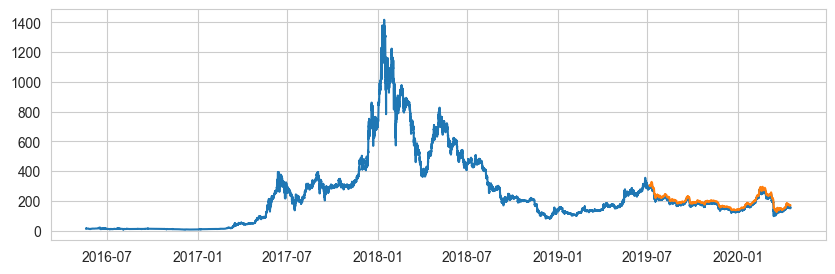

In [26]:
plt.subplots(figsize=(10,3))
sns.lineplot(x=dates,y=target)
test_dates = np.reshape(test_dates,(1,-1))[0]
target_pred = np.reshape(target_pred,(1,-1))[0]
sns.lineplot(x=test_dates,y=target_pred)

### Prediction of Future Values

In [27]:
mms_2 = MinMaxScaler()
window_scaled_2 = mms_2.fit_transform(window)
target_scaled_2 = mms_2.fit_transform(target.reshape(-1,1))

joblib.dump(value=mms_2,filename="app/scaler.joblib")

['app/scaler.joblib']

In [28]:
train_val_threshold_2 = round(0.8 * window.shape[0])
no_of_window_samples_2 = 240

window_train_2 = window_scaled_2[:train_val_threshold_2]
target_train_2 = target_scaled_2[:train_val_threshold_2]

window_val_2 = window_scaled_2[train_val_threshold_2:]
target_val_2 = target_scaled_2[train_val_threshold_2:]

no_of_train_rows_2 = window_train_2.shape[0]
no_of_val_rows_2 = window_val_2.shape[0]

window_train_2 = window_train_2.reshape(no_of_train_rows_2,1,no_of_window_samples_2)
window_val_2 = window_val_2.reshape(no_of_val_rows_2,1,no_of_window_samples_2)

In [29]:
model_2 = tf.keras.models.Sequential(layers=[
    tf.keras.layers.LSTM(units=100,input_shape=(1,no_of_window_samples_2)),
    tf.keras.layers.Dropout(rate=0.25),
    tf.keras.layers.Dense(1,activation="linear")
])

joblib.dump(value=model_2,filename="app/model.joblib")

['app/model.joblib']

In [30]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.mean_squared_error)

In [31]:
model_2.fit(window_train_2,target_train_2,validation_data=(window_val_2,target_val_2),epochs=100,batch_size=32,verbose=1,shuffle=True,callbacks=tf.keras.callbacks.EarlyStopping(patience=2))

Epoch 1/100
857/857 [==============================] - 6s 4ms/step - loss: 0.0012 - val_loss: 1.7712e-05
Epoch 2/100
857/857 [==============================] - 5s 6ms/step - loss: 6.5479e-04 - val_loss: 3.2244e-05
Epoch 3/100
857/857 [==============================] - 6s 7ms/step - loss: 5.2803e-04 - val_loss: 1.0425e-05
Epoch 4/100
857/857 [==============================] - 7s 8ms/step - loss: 4.4044e-04 - val_loss: 1.9691e-04
Epoch 5/100
857/857 [==============================] - 8s 9ms/step - loss: 4.3136e-04 - val_loss: 1.4635e-05


In [32]:
future_start_date = "2020-04-16 01:00:00"
future_end_date = pd.to_datetime("2020-05-17 01:00:00")

future_dates = pd.date_range(start=future_start_date,end=future_end_date,freq="h").values

In [33]:
window_test_2 = []
target_test_2 = []

input_arr_2 = np.array(window_scaled_2[-1,1:].tolist() + [target_scaled_2[-1][0]])
output_2 = model.predict(input_arr_2.reshape(1,1,-1),verbose=0)[0][0]
window_test_2.append(input_arr_2)
target_test_2.append(output_2)
i = 0
print((i+1),":",len(future_dates))

for i in range(1,len(future_dates)):
    current_window_2 = window_test_2[i-1]
    input_arr_2 = np.array(current_window_2[1:].tolist() + [target_test_2[i-1]])
    output_2 = model_2.predict(input_arr_2.reshape(1,1,-1))[0][0]
    window_test_2.append(input_arr_2)
    target_test_2.append(output_2)
    print((i+1),":",len(future_dates))

window_test_2 = np.array(window_test_2)
target_test_2 = np.array(target_test_2)

1 : 745
1/1 [==============================] - 0s 439ms/step
2 : 745
1/1 [==============================] - 0s 29ms/step
3 : 745
1/1 [==============================] - 0s 33ms/step
4 : 745
1/1 [==============================] - 0s 21ms/step
5 : 745
1/1 [==============================] - 0s 24ms/step
6 : 745
1/1 [==============================] - 0s 33ms/step
7 : 745
1/1 [==============================] - 0s 25ms/step
8 : 745
1/1 [==============================] - 0s 29ms/step
9 : 745
1/1 [==============================] - 0s 28ms/step
10 : 745
1/1 [==============================] - 0s 27ms/step
11 : 745
1/1 [==============================] - 0s 26ms/step
12 : 745
1/1 [==============================] - 0s 29ms/step
13 : 745
1/1 [==============================] - 0s 31ms/step
14 : 745
1/1 [==============================] - 0s 27ms/step
15 : 745
1/1 [==============================] - 0s 22ms/step
16 : 745
1/1 [==============================] - 0s 23ms/step
17 : 745
1/1 [==================

In [34]:
target_pred_2 = mms.inverse_transform(target_test_2.reshape(-1,1))
target_pred_2

array([[170.00131],
       [155.85962],
       [155.81697],
       [155.60529],
       [155.22203],
       [155.60205],
       [155.40926],
       [155.20972],
       [154.81346],
       [154.72603],
       [154.54132],
       [154.60605],
       [154.9273 ],
       [154.78375],
       [154.84671],
       [154.52527],
       [154.43665],
       [154.38391],
       [154.46207],
       [154.42262],
       [154.58469],
       [154.53883],
       [154.37157],
       [154.26608],
       [153.82555],
       [153.66621],
       [153.99857],
       [153.84534],
       [153.83192],
       [153.96059],
       [153.94675],
       [153.93634],
       [154.0371 ],
       [154.0624 ],
       [154.13599],
       [154.08102],
       [154.2752 ],
       [154.18692],
       [153.83675],
       [153.91359],
       [153.71695],
       [153.8322 ],
       [153.73265],
       [153.37503],
       [153.62062],
       [153.62862],
       [153.7794 ],
       [153.93484],
       [153.8607 ],
       [153.68216],


<Axes: >

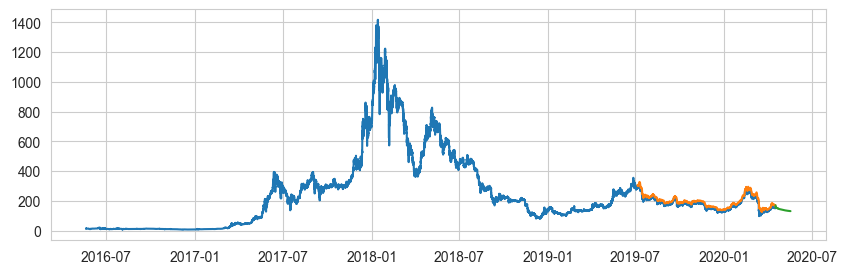

In [35]:
plt.subplots(figsize=(10,3))
sns.lineplot(x=dates,y=target)
test_dates = np.reshape(test_dates,(1,-1))[0]
target_pred = np.reshape(target_pred,(1,-1))[0]
sns.lineplot(x=test_dates,y=target_pred)
sns.lineplot(x=future_dates,y=target_pred_2.reshape(1,-1)[0])

<Axes: >

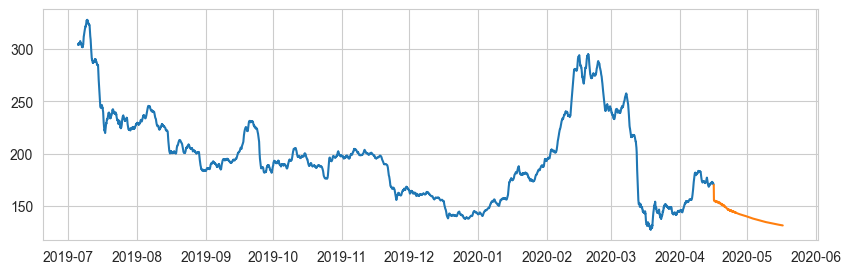

In [36]:
plt.subplots(figsize=(10,3))
test_dates = np.reshape(test_dates,(1,-1))[0]
target_pred = np.reshape(target_pred,(1,-1))[0]
sns.lineplot(x=test_dates,y=target_pred)
sns.lineplot(x=future_dates,y=target_pred_2.reshape(1,-1)[0])

<Axes: >

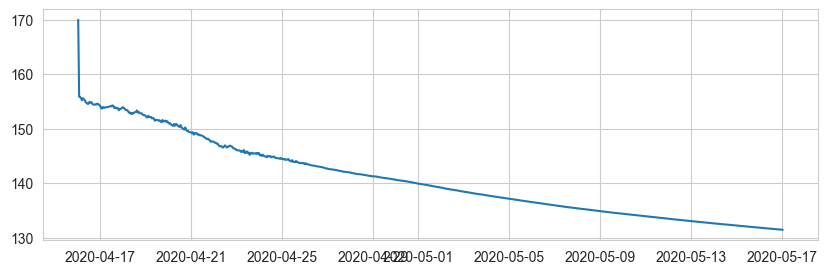

In [37]:
plt.subplots(figsize=(10,3))
test_dates = np.reshape(test_dates,(1,-1))[0]
target_pred = np.reshape(target_pred,(1,-1))[0]
sns.lineplot(x=future_dates,y=target_pred_2.reshape(1,-1)[0])